In [7]:
import numpy as np
import pandas as pd
from datetime import date, time, datetime, timedelta 
from dateutil import parser
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import random
import timeit

import warnings
warnings.filterwarnings("ignore")



In [8]:
mydateparser = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
testboston=pd.read_csv("Boston/boston_2015.csv", parse_dates=['start_time', "end_time"], date_parser=mydateparser)

In [9]:
testboston = testboston.drop(testboston.index[21566])
testboston

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2015-01-01 00:21:44,2015-01-01 00:30:47,115,96,Porter Square Station,Cambridge Main Library at Broadway / Trowbridg...,277,Subscriber
1,2015-01-01 00:27:03,2015-01-01 00:34:21,80,95,MIT Stata Center at Vassar St / Main St,Cambridge St - at Columbia St / Webster Ave,648,Subscriber
2,2015-01-01 00:31:31,2015-01-01 00:35:46,91,68,One Kendall Square at Hampshire St / Portland St,Central Square at Mass Ave / Essex St,555,Subscriber
3,2015-01-01 00:53:46,2015-01-01 01:00:58,115,96,Porter Square Station,Cambridge Main Library at Broadway / Trowbridg...,1307,Subscriber
4,2015-01-01 01:07:06,2015-01-01 01:19:21,105,88,Lower Cambridgeport at Magazine St/Riverside Rd,Inman Square at Vellucci Plaza / Hampshire St,177,Customer
...,...,...,...,...,...,...,...,...
1122553,2015-12-31 23:35:04,2015-12-31 23:43:15,73,88,Harvard Square at Brattle St / Eliot St,Inman Square at Vellucci Plaza / Hampshire St,1473,Subscriber
1122554,2015-12-31 23:37:29,2015-12-31 23:47:36,135,43,ID Building East,Rowes Wharf - Atlantic Ave,649,Subscriber
1122555,2015-12-31 23:38:16,2015-12-31 23:47:26,135,43,ID Building East,Rowes Wharf - Atlantic Ave,1552,Subscriber
1122556,2015-12-31 23:46:04,2015-12-31 23:48:04,36,36,Boston Public Library - 700 Boylston St.,Boston Public Library - 700 Boylston St.,1083,Customer


In [10]:
testboston['end_station_id'] = testboston['end_station_id'].astype(int)

In [11]:
#creating column 'Duration'
testboston["Duration"]=testboston["end_time"]-testboston["start_time"]
x=timedelta(days=5)
x
testboston[testboston["Duration"]>x]


,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,Duration
17481,2015-03-17 16:26:54,2015-03-24 08:59:15,68,72,Central Square at Mass Ave / Essex St,One Broadway / Kendall Sq at Main St / 3rd St,1079,Subscriber,6 days 16:32:21
18313,2015-03-20 02:24:09,2015-09-27 16:53:58,68,73,Central Square at Mass Ave / Essex St,Harvard Square at Brattle St / Eliot St,714,Customer,191 days 14:29:49
19573,2015-03-24 09:24:59,2015-04-01 07:44:53,90,72,Lechmere Station at Cambridge St / First St,One Broadway / Kendall Sq at Main St / 3rd St,667,Subscriber,7 days 22:19:54
22825,2015-03-31 15:50:05,2015-04-08 07:59:44,76,70,Central Sq Post Office / Cambridge City Hall a...,Harvard Kennedy School at Bennett St / Eliot St,874,Subscriber,7 days 16:09:39
34889,2015-04-17 14:24:23,2015-05-02 14:21:18,49,106,Stuart St. at Charles St.,Mt Pleasant Ave / Dudley Town Common,923,Subscriber,14 days 23:56:55
...,...,...,...,...,...,...,...,...,...
1119082,2015-12-25 22:40:48,2015-12-30 22:59:11,33,21,Kenmore Sq / Comm Ave,Prudential Center / Belvidere,489,Subscriber,5 days 00:18:23
1119642,2015-12-26 20:00:48,2016-01-01 15:32:11,10,175,B.U. Central - 725 Comm. Ave.,Brighton Center,498,Subscriber,5 days 19:31:23
1119793,2015-12-27 10:46:20,2016-01-03 18:31:17,44,47,Faneuil Hall - Union St. at North St.,Cross St. at Hanover St.,672,Subscriber,7 days 07:44:57
1120112,2015-12-27 16:59:30,2016-01-03 21:36:27,108,25,Harvard University / SEAS Cruft-Pierce Halls a...,Tremont St / W Newton St,182,Subscriber,7 days 04:36:57


In [12]:
def get_weekday (ts):
    return ts.weekday()
#0=Monday 6=Sunday
testboston["Weekday"]=testboston["start_time"].apply(lambda x:get_weekday(x))

In [ ]:
def get_month (ts):
    return ts.month()
#0=Monday 6=Sunday
testboston["Month"]=testboston["start_time"].apply(lambda x:get_month(x))

In [ ]:
#testboston

In [ ]:
#s=datetime.strptime("2015-01-01","%Y-%m-%d")
#e=datetime.strptime("2015-07-01","%Y-%m-%d")

In [ ]:
#testboston[testboston["start_time"]<e]

In [16]:
#testboston[testboston["Weekday"]>4]

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,Duration,Weekday
340,2015-01-03 00:04:24,2015-01-03 00:12:08,107,76,Ames St at Main St,Central Sq Post Office / Cambridge City Hall a...,776,Subscriber,0 days 00:07:44,5
341,2015-01-03 00:39:44,2015-01-03 00:44:17,110,88,Harvard University Gund Hall at Quincy St / Ki...,Inman Square at Vellucci Plaza / Hampshire St,645,Subscriber,0 days 00:04:33,5
342,2015-01-03 01:05:44,2015-01-03 01:23:44,91,118,One Kendall Square at Hampshire St / Portland St,Linear Park - Mass. Ave. at Cameron Ave.,857,Subscriber,0 days 00:18:00,5
343,2015-01-03 01:12:49,2015-01-03 01:24:31,87,89,Harvard University Housing - 115 Putnam Ave at...,Harvard Law School at Mass Ave / Jarvis St,754,Subscriber,0 days 00:11:42,5
344,2015-01-03 03:04:59,2015-01-03 03:10:11,74,104,Harvard Square at Mass Ave/ Dunster,Harvard University Radcliffe Quadrangle at She...,1324,Subscriber,0 days 00:05:12,5
...,...,...,...,...,...,...,...,...,...,...
1120230,2015-12-27 23:11:28,2015-12-27 23:17:09,38,40,TD Garden - Causeway at Portal Park #2,Lewis Wharf - Atlantic Ave.,986,Subscriber,0 days 00:05:41,6
1120231,2015-12-27 23:34:46,2015-12-27 23:43:31,47,163,Cross St. at Hanover St.,Lawn on D,1511,Customer,0 days 00:08:45,6
1120232,2015-12-27 23:41:50,2015-12-27 23:55:41,95,176,Cambridge St - at Columbia St / Webster Ave,Lesley University,900,Customer,0 days 00:13:51,6
1120233,2015-12-27 23:43:06,2015-12-27 23:52:34,88,176,Inman Square at Vellucci Plaza / Hampshire St,Lesley University,348,Subscriber,0 days 00:09:28,6


In [ ]:
testboston["start_time"][21566]

In [14]:
dicta={}
for i in range(24):
    dicta[i]=0
dicta

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0}

In [15]:
time = pd.Series(dicta)
for x in range(len(testboston)):
    if x==21566:
        x=x+1
    akt=testboston["start_time"][x]
    dicta[akt.hour]=(dicta[akt.hour])+1
print(dicta)


{0: 8982, 1: 5534, 2: 3472, 3: 1130, 4: 1146, 5: 5958, 6: 24262, 7: 64556, 8: 101336, 9: 60969, 10: 45736, 11: 51147, 12: 60862, 13: 61518, 14: 60746, 15: 67625, 16: 95211, 17: 129992, 18: 93847, 19: 64928, 20: 43517, 21: 31338, 22: 23592, 23: 15153}


In [42]:
#improving 
time = pd.Series(dicta)
for x in range(len(testboston)):
    if x==21566:
        x=x+1
    akt=testboston["start_time"][x]
    bkt=testboston["end_time"][x]
    if bkt.hour - s :
        dicta[akt.hour +i]=(dicta[akt.hour])+1
        i += 1
print(dicta)


AttributeError: 'Timedelta' object has no attribute 'hour'

In [18]:
p=0
for x in range(len(dicta)):
    p=p+dicta[x]
p

1122557

In [22]:
#testboston["start_time"].dt.year


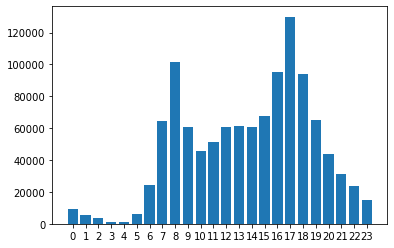

In [20]:
plt.bar(range(len(dicta)), list(dicta.values()), align='center')
plt.xticks(range(len(dicta)), list(dicta.keys()))
plt.show()

In [21]:
dicta_wweek={}
for i in range(24):
    dicta_wweek[i]=0


In [ ]:

testboston["start_time"].dt.weekday 
testboston

In [ ]:
time = pd.Series(dicta)                           
                              
for x in range(len(testboston)):
    if x==21566:
        x=x+1
    akt=testboston["start_time"][x]
    dicta[akt.hour]=(dicta[akt.hour])+1
print(dicta)